In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [2]:
# load data 
data = pd.read_csv("data_abtest.csv")

In [3]:
data.head()

,Unnamed: 0,user_id,timestamp,group,landing_page,converted
0,0,851104,2021-10-21 22:11:48.556739,control,old_page,0
1,1,804228,2021-10-12 08:01:45.159739,control,old_page,0
2,2,661590,2021-10-11 16:55:06.154213,treatment,new_page,0
3,3,853541,2021-10-08 18:28:03.143765,treatment,new_page,0
4,4,864975,2021-10-21 01:52:26.210827,control,old_page,1


In [4]:
data.drop(["Unnamed: 0"], axis=1)

,user_id,timestamp,group,landing_page,converted
0,851104,2021-10-21 22:11:48.556739,control,old_page,0
1,804228,2021-10-12 08:01:45.159739,control,old_page,0
2,661590,2021-10-11 16:55:06.154213,treatment,new_page,0
3,853541,2021-10-08 18:28:03.143765,treatment,new_page,0
4,864975,2021-10-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2021-10-03 22:28:38.630509,control,old_page,0
294474,945152,2021-10-12 00:51:57.078372,control,old_page,0
294475,734608,2021-10-22 11:45:03.439544,control,old_page,0
294476,697314,2021-10-15 01:20:28.957438,control,old_page,0


In [5]:
pd.crosstab(data['group'], data['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [6]:
# The hypothesis:
# Null hypothesis: There is no significant statistical difference
# between the conversion rate of new and old websites

In [7]:
# checking for users appearing multiple times
user_counts = data['user_id'].value_counts(ascending=False)
multi_users = user_counts[user_counts > 1].count()

print("Number of users appear multiple times: ", multi_users)

Number of users appear multiple times:  3894


In [8]:
# drop multi_users
multi_users_index = user_counts[user_counts > 1].index
data = data[~data['user_id'].isin(multi_users_index)]

In [9]:
# visualizing conversion rates of the 2 groups 
conversion_rates = data.groupby('group')['converted']

conversion_rates = conversion_rates.agg([np.mean])

conversion_rates.columns = ['conversion_rate']

conversion_rates.style.format('{:.3f}')
# about 12% for the old webpage, and 12.3% for the new webpage

,conversion_rate
group,
control,0.120
treatment,0.123


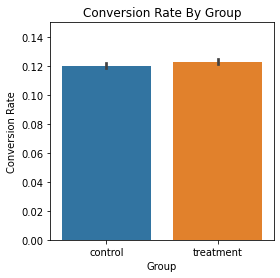

In [10]:
plt.figure(figsize=(4,4))
sns.barplot(x=data['group'], y=data['converted'])
plt.ylim(0, 0.15)
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate By Group')
plt.show()

In [11]:
# Numbr of conversion in each group 
control_group = data[data['group'] == 'control']['converted']
treatment_group = data[data['group'] == 'treatment']['converted']

control_count = control_group.sum()
control_total = control_group.count()
treatment_count = treatment_group.sum()
treatment_total = treatment_group.count()

print("Number of conversion in control group: ", control_count)
print("Total number of control group: ", control_total)
print("Number of conversion in treatment group: ", treatment_count)
print("Total number of treatment group: ", treatment_total)

Number of conversion in control group:  17220
Total number of control group:  143293
Number of conversion in treatment group:  17629
Total number of treatment group:  143397


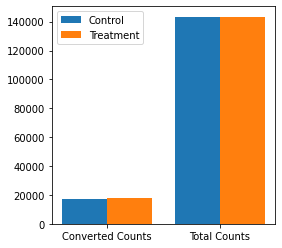

In [12]:
# visualize the result
plt.figure(figsize=(4,4))

group = ['Converted Counts', 'Total Counts']
control = [control_count, control_total]
treatment = [treatment_count, treatment_total]

x_axis = np.arange(len(group))

plt.bar(x_axis-0.2, control, width=0.4, label='Control')
plt.bar(x_axis+0.2, treatment, width=0.4, label='Treatment')

plt.xticks(x_axis, group)
plt.legend()
plt.show()

In [13]:
# standard deviation and error of each group
std_p = lambda x: np.std(x)
se_p = lambda x: stats.sem(x)

conv_rate = data.groupby('group')['converted']
conv_rate = conv_rate.agg([std_p, se_p])
conv_rate.columns = ['std_deviation', 'std_error']
conv_rate.style.format('{:.3f}')

,std_deviation,std_error
group,,
control,0.325,0.001
treatment,0.328,0.001


In [14]:
# total_counts = [control_total, treatment_total]
# converted_counts = [control_count, treatment_count]

# z_stat, p_val = proportions_ztest(converted_counts, nobs=total_counts)
# (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(converted_counts, nobs=total_counts)

# print(f"z statistics: {z_stat:.3f}")
# print(f"p value: {p_val:.3f}")
# print(f"Lower confidence interval:[{lower_con:.3f}, {upper_con:.3f}]")
# print(f"Upper confidence interval:[{lower_treat:.3f}, {upper_treat:.3f}]")

In [104]:
# conducting z-test
z_score, p_value = sm.stats.proportions_ztest([control_count, treatment_count], [control_total, treatment_total], alternative='larger')
z_score, p_value

(-2.265352032780029, 0.02349108538021678)

In [ ]:
# The P-value is 0.905 > 0.05 (the default alpha value), 
# the null hypothesis is accecpted. 
# The new webpage is not better than the old one